### Correlation between news and stock Price

In [1]:
# import all necssary libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

import warnings 
warnings.filterwarnings('ignore')
sys.path.insert(0, os.path.dirname(os.getcwd()))

from src.correlation_analysis import *

##### Load and merge the dataset

In [2]:
# get data path
folder_path = '../data/yfinance_data/'
# Automatically merge the data and assign to stock_analyzer
corr_analyser =CorrelationAnalyzer(folder_path=folder_path)
# Access the merged data
print(corr_analyser.data.head())
# save the merged data to a CSV file

         Date      Open      High       Low     Close  Adj Close      Volume  \
0  1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1  1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
2  1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000   
3  1997-05-20  0.086458  0.087500  0.081771  0.081771   0.081771   109344000   
4  1997-05-21  0.081771  0.082292  0.068750  0.071354   0.071354   377064000   

   Dividends  Stock Splits stock_symbol  
0        0.0           0.0         AMZN  
1        0.0           0.0         AMZN  
2        0.0           0.0         AMZN  
3        0.0           0.0         AMZN  
4        0.0           0.0         AMZN  


In [3]:
#Sentment data
stock_data=corr_analyser.merge_csv_files(folder_path)
#Sentment data
news_data=pd.read_csv('../data/sentiment.csv')

In [4]:
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,stock_symbol
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0,AMZN
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0,AMZN
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0,AMZN
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0,AMZN
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0,AMZN
...,...,...,...,...,...,...,...,...,...,...
45423,2024-07-24,175.389999,177.949997,173.570007,174.369995,174.369995,31250700,0.0,0.0,GOOG
45424,2024-07-25,174.250000,175.199997,169.050003,169.160004,169.160004,28967900,0.0,0.0,GOOG
45425,2024-07-26,168.770004,169.839996,165.865005,168.679993,168.679993,25150100,0.0,0.0,GOOG
45426,2024-07-29,170.500000,172.160004,169.720001,171.130005,171.130005,13768900,0.0,0.0,GOOG


In [5]:
news_data


,headline,url,publisher,date,stock,headline_length,year,month,day_of_week,cleaned_headline,polarity,sentiment
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,39,2020.0,6.0,Friday,stocks hit week highs friday,0.00,Neutral
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,42,2020.0,6.0,Wednesday,stocks hit week highs wednesday,0.00,Neutral
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,29,2020.0,5.0,Tuesday,biggest movers friday,0.00,Neutral
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,44,2020.0,5.0,Friday,stocks moving fridays midday session,0.00,Neutral
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,87,2020.0,5.0,Friday,b securities maintains neutral agilent technol...,0.00,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
1407323,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,NaN,ZX,38,NaN,NaN,NaN,top narrow based indexes august,0.15,positive
1407324,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,NaN,ZX,52,NaN,NaN,NaN,recap wednesdays top percentage gainers losers,0.15,positive
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,NaN,ZX,56,NaN,NaN,NaN,update oppenheimer color china zenix auto init...,0.00,Neutral
1407326,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,NaN,ZX,54,NaN,NaN,NaN,oppenheimer initiates china zenix outperform pt,0.00,Neutral


##### Data preparation

In [6]:
# Convert the 'date' column to datetime format and UTC-4 timezone
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='ISO8601', utc=True)
news_data['date']=pd.to_datetime(news_data['date'], format='ISO8601', utc=True)
print("Minimum date from news dataset:  ",news_data.date.min())
print("Maximum date from news dataset:  ",news_data.date.max())
print("Minimum date from Stock dataset:  ",stock_data.Date.min())
print("Max date from Stock dataset:  ",stock_data.Date.max())

Minimum date from news dataset:   2011-04-28 01:01:48+00:00
Maximum date from news dataset:   2020-06-11 21:12:35+00:00
Minimum date from Stock dataset:   1980-12-12 00:00:00+00:00
Max date from Stock dataset:   2024-07-30 00:00:00+00:00


In [7]:
news_data.columns

Index(['headline', 'url', 'publisher', 'date', 'stock', 'headline_length',
       'year', 'month', 'day_of_week', 'cleaned_headline', 'polarity',
       'sentiment'],
      dtype='object')

In [8]:
for column in ['headline', 'url', 'publisher']:
    news_data.drop(column, axis=1, inplace=True)

In [9]:
news_data

,date,stock,headline_length,year,month,day_of_week,cleaned_headline,polarity,sentiment
0,2020-06-05 14:30:54+00:00,A,39,2020.0,6.0,Friday,stocks hit week highs friday,0.00,Neutral
1,2020-06-03 14:45:20+00:00,A,42,2020.0,6.0,Wednesday,stocks hit week highs wednesday,0.00,Neutral
2,2020-05-26 08:30:07+00:00,A,29,2020.0,5.0,Tuesday,biggest movers friday,0.00,Neutral
3,2020-05-22 16:45:06+00:00,A,44,2020.0,5.0,Friday,stocks moving fridays midday session,0.00,Neutral
4,2020-05-22 15:38:59+00:00,A,87,2020.0,5.0,Friday,b securities maintains neutral agilent technol...,0.00,Neutral
...,...,...,...,...,...,...,...,...,...
1407323,NaT,ZX,38,NaN,NaN,NaN,top narrow based indexes august,0.15,positive
1407324,NaT,ZX,52,NaN,NaN,NaN,recap wednesdays top percentage gainers losers,0.15,positive
1407325,NaT,ZX,56,NaN,NaN,NaN,update oppenheimer color china zenix auto init...,0.00,Neutral
1407326,NaT,ZX,54,NaN,NaN,NaN,oppenheimer initiates china zenix outperform pt,0.00,Neutral


In [10]:
# Check the missing values in each columns
news_data.isnull().sum()

date                1351341
stock                     0
headline_length           0
year                1351341
month               1351341
day_of_week         1351341
cleaned_headline          9
polarity                  0
sentiment                 0
dtype: int64

In [11]:
# drop any row that have a missing values
news_data.dropna(axis=0, inplace=True)

In [12]:
news_data.shape

(55987, 9)

In [13]:
stock_data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
stock_symbol    0
dtype: int64

In [14]:
# Rename 'date' into 'Date' from news_data to make consistent
news_data.rename(columns={'date': 'Date'}, inplace=True)

In [15]:
# Extract dates from news and stock price datasets
news_dates = news_data['Date']
stock_dates = stock_data['Date']

In [16]:
# Normalize timestamps
news_dates = pd.to_datetime(news_dates).dt.date
stock_dates = pd.to_datetime(stock_dates).dt.date

In [17]:
# Find overlaping date range
start_date=max(news_dates.min(), stock_dates.min())
end_date=min(news_dates.max(), stock_dates.max())
news_data['Date']=pd.to_datetime(news_data['Date']).dt.date
stock_data['Date']=pd.to_datetime(stock_data['Date']).dt.date

In [18]:
# Filter the data based on the specified date range
news_data=news_data[(news_data['Date']>=start_date) &  (news_data['Date']<=end_date)]
stock_data=stock_data[(stock_data['Date']>=start_date) & (stock_data['Date']<=end_date)]

In [19]:
# merge stock price and news dataset basedon the sepecified date
merged_data=pd.merge(news_data,stock_data, on='Date')

In [20]:
# display ancd check merged dataset
merged_data

,Date,stock,headline_length,year,month,day_of_week,cleaned_headline,polarity,sentiment,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,stock_symbol
0,2020-06-05,A,39,2020.0,6.0,Friday,stocks hit week highs friday,0.0,Neutral,122.225502,124.432503,121.856499,124.150002,124.150002,66128000,0.0,0.0,AMZN
1,2020-06-05,A,39,2020.0,6.0,Friday,stocks hit week highs friday,0.0,Neutral,182.619995,187.729996,182.009995,187.199997,180.403564,39893600,0.0,0.0,MSFT
2,2020-06-05,A,39,2020.0,6.0,Friday,stocks hit week highs friday,0.0,Neutral,58.522667,59.101334,57.746666,59.043999,59.043999,117178500,0.0,0.0,TSLA
3,2020-06-05,A,39,2020.0,6.0,Friday,stocks hit week highs friday,0.0,Neutral,226.710007,231.350006,225.309998,230.770004,230.296753,16750400,0.0,0.0,META
4,2020-06-05,A,39,2020.0,6.0,Friday,stocks hit week highs friday,0.0,Neutral,8.794500,8.997000,8.708000,8.920000,8.893502,481748000,0.0,0.0,NVDA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385050,2017-11-14,ZX,45,2017.0,11.0,Tuesday,stocks moving tuesdays midday session,0.0,Neutral,21.000000,21.090000,20.459999,20.580000,20.580000,85141500,0.0,0.0,TSLA
385051,2017-11-14,ZX,45,2017.0,11.0,Tuesday,stocks moving tuesdays midday session,0.0,Neutral,178.130005,178.970001,177.179993,178.070007,177.704834,9585900,0.0,0.0,META
385052,2017-11-14,ZX,45,2017.0,11.0,Tuesday,stocks moving tuesdays midday session,0.0,Neutral,5.325000,5.370000,5.280750,5.354500,5.293764,529292000,0.0,0.0,NVDA
385053,2017-11-14,ZX,45,2017.0,11.0,Tuesday,stocks moving tuesdays midday session,0.0,Neutral,43.259998,43.369999,42.794998,42.834999,40.352261,99130000,0.0,0.0,AAPL


In [21]:
# Keep only the rows where 'stock' is equal to 'stock_symbol'
filtered_data=merged_data[merged_data['stock']==merged_data['stock_symbol']]
filtered_data

,Date,stock,headline_length,year,month,day_of_week,cleaned_headline,polarity,sentiment,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,stock_symbol
719,2020-06-10,AAPL,69,2020.0,6.0,Wednesday,tech stocks faangs strong start day market awa...,0.433333,positive,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0,AAPL
726,2020-06-10,AAPL,45,2020.0,6.0,Wednesday,biggest price target changes wednesday,0.000000,Neutral,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0,AAPL
733,2020-06-10,AAPL,87,2020.0,6.0,Wednesday,benzinga pros top stocks watch wed jun aapl ba...,0.500000,positive,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0,AAPL
740,2020-06-10,AAPL,65,2020.0,6.0,Wednesday,deutsche bank maintains buy apple raises price...,0.000000,Neutral,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0,AAPL
747,2020-06-10,AAPL,87,2020.0,6.0,Wednesday,apple let users trade mac computers credit us ...,0.000000,Neutral,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0,AAPL
754,2020-06-10,AAPL,55,2020.0,6.0,Wednesday,big tech reaches new record heights stock market,0.068182,positive,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0,AAPL
761,2020-06-09,AAPL,41,2020.0,6.0,Tuesday,apples stock trading higher today,0.250000,positive,83.035004,86.402496,83.002502,85.997498,83.889359,147712400,0.0,0.0,AAPL
768,2020-06-09,AAPL,60,2020.0,6.0,Tuesday,apple could announce inhouse chips macs wwdc r...,0.000000,Neutral,83.035004,86.402496,83.002502,85.997498,83.889359,147712400,0.0,0.0,AAPL
775,2020-06-09,AAPL,179,2020.0,6.0,Tuesday,apple shares trading higher despite market wea...,0.050000,positive,83.035004,86.402496,83.002502,85.997498,83.889359,147712400,0.0,0.0,AAPL
782,2020-06-09,AAPL,159,2020.0,6.0,Tuesday,sonos shares spike session high citrons andrew...,0.053333,positive,83.035004,86.402496,83.002502,85.997498,83.889359,147712400,0.0,0.0,AAPL


In [22]:
# Drop column 'stock_symbol' from the dataframe filterd
filtered_data=filtered_data.drop(columns=['stock_symbol'])

In [23]:
#  Rename column 'stock' with 'Ticker_symbole' and display the data
filtered_data.rename(columns={'stock':'Ticker_symbol'}, inplace=True)
filtered_data

,Date,Ticker_symbol,headline_length,year,month,day_of_week,cleaned_headline,polarity,sentiment,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
719,2020-06-10,AAPL,69,2020.0,6.0,Wednesday,tech stocks faangs strong start day market awa...,0.433333,positive,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0
726,2020-06-10,AAPL,45,2020.0,6.0,Wednesday,biggest price target changes wednesday,0.000000,Neutral,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0
733,2020-06-10,AAPL,87,2020.0,6.0,Wednesday,benzinga pros top stocks watch wed jun aapl ba...,0.500000,positive,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0
740,2020-06-10,AAPL,65,2020.0,6.0,Wednesday,deutsche bank maintains buy apple raises price...,0.000000,Neutral,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0
747,2020-06-10,AAPL,87,2020.0,6.0,Wednesday,apple let users trade mac computers credit us ...,0.000000,Neutral,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0
754,2020-06-10,AAPL,55,2020.0,6.0,Wednesday,big tech reaches new record heights stock market,0.068182,positive,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0
761,2020-06-09,AAPL,41,2020.0,6.0,Tuesday,apples stock trading higher today,0.250000,positive,83.035004,86.402496,83.002502,85.997498,83.889359,147712400,0.0,0.0
768,2020-06-09,AAPL,60,2020.0,6.0,Tuesday,apple could announce inhouse chips macs wwdc r...,0.000000,Neutral,83.035004,86.402496,83.002502,85.997498,83.889359,147712400,0.0,0.0
775,2020-06-09,AAPL,179,2020.0,6.0,Tuesday,apple shares trading higher despite market wea...,0.050000,positive,83.035004,86.402496,83.002502,85.997498,83.889359,147712400,0.0,0.0
782,2020-06-09,AAPL,159,2020.0,6.0,Tuesday,sonos shares spike session high citrons andrew...,0.053333,positive,83.035004,86.402496,83.002502,85.997498,83.889359,147712400,0.0,0.0


In [ ]:
##### Correlation Analysis

In [24]:
# Calculate daily returns using calculate_daily_returns function
filtered_data['daily_return']=corr_analyser.calculate_daily_returns(filtered_data['Close'])

In [25]:
filtered_data['daily_return']

719            NaN
726       0.000000
733       0.000000
740       0.000000
747       0.000000
754       0.000000
761      -0.025082
768       0.000000
775       0.000000
782       0.000000
18302     0.539260
18309     0.000000
18316     0.000000
18323     0.000000
18330     0.000000
18337     0.000000
18344    -0.017598
18351     0.000000
18358     0.000000
18365     0.000000
151676   -0.436398
151683    0.000000
151690    0.000000
151697   -0.006611
151704    0.000000
151711   -0.006558
151718   -0.005682
151725    0.000000
151732    0.000000
151739   -0.018222
249186   -0.867343
249193    0.000000
249200    0.000000
249207   -0.034243
249214   -0.026642
249221    0.000000
249228    0.000000
249235    0.002300
249242    0.000000
346509    6.743313
346516    0.000000
346523    0.000000
346530    0.000000
346537    0.000000
346544    0.000000
346551    0.000000
346558    0.000000
346565    0.000000
346572    0.000000
Name: daily_return, dtype: float64

In [26]:
# Remove specified columns from a pandas DataFrame
col_drop=['Stock Splits','Dividends']
filtered_data.drop(col_drop,axis=1,inplace=True)

In [27]:
# Aggregate data by date and Ticker_symbol with polarity by mean, while keeping all columns first value
aggregated_data = filtered_data.groupby(['Date', 'Ticker_symbol'], as_index=False).agg({
    'polarity': 'mean',           
    'Open': 'first',              
    'High': 'first',               
    'Low': 'first',                 
    'Close': 'first',             
    'Adj Close': 'first',          
    'Volume': 'first',               
    'daily_return':'first'          
})

In [29]:
aggregated_data

,Date,Ticker_symbol,polarity,Open,High,Low,Close,Adj Close,Volume,daily_return
0,2020-06-02,NVDA,0.000000,8.796250,8.837250,8.658000,8.825250,8.795022,391320000,0.002300
1,2020-06-04,GOOG,0.000000,71.519997,71.947998,70.236504,70.609001,70.528740,29686000,-0.018222
2,2020-06-05,GOOG,0.000000,70.658501,72.252502,70.300003,71.919502,71.837753,34698000,-0.005682
3,2020-06-08,GOOG,0.139394,71.116997,72.399498,71.116997,72.330498,72.248283,28084000,-0.006558
4,2020-06-08,NVDA,0.000000,8.877250,8.889750,8.685750,8.805000,8.778847,387736000,-0.026642
5,2020-06-09,AAPL,0.088333,83.035004,86.402496,83.002502,85.997498,83.889359,147712400,-0.025082
6,2020-06-09,AMZN,-0.031250,126.472000,131.321503,126.250000,130.042999,130.042999,103520000,-0.017598
7,2020-06-09,GOOG,0.066667,72.267998,73.400002,72.160500,72.807999,72.725243,28184000,-0.006611
8,2020-06-09,NVDA,0.262500,8.800000,9.109750,8.751250,9.046000,9.019129,468488000,-0.034243
9,2020-06-10,AAPL,0.166919,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.000000


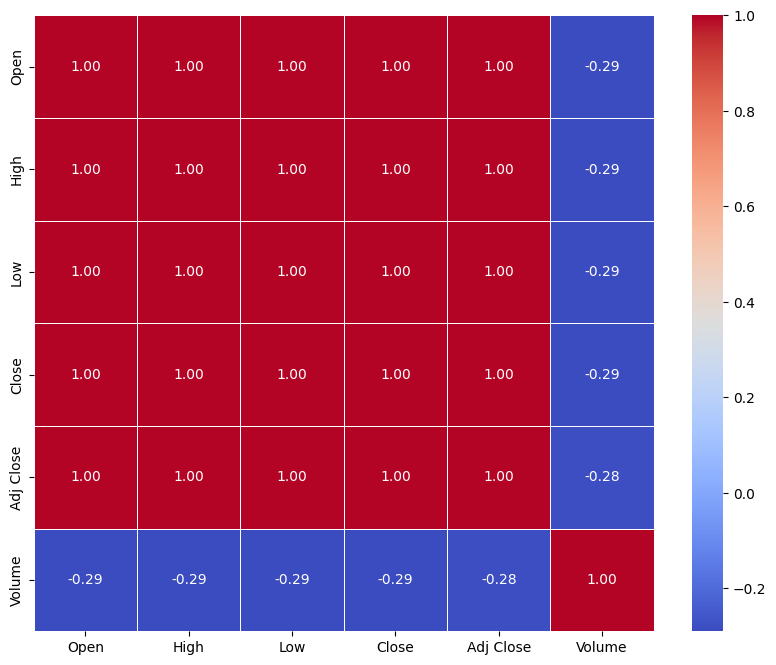

In [30]:
corr_analyser.correlation_matrix(aggregated_data)

In [31]:
# Get unique stock symbols
corr_analyser.correlation_each_symbol(aggregated_data)

,Ticker_symbol,correlation
0,NVDA,0.173850
1,GOOG,0.311355
2,AAPL,1.000000
3,AMZN,1.000000
4,TSLA,NaN


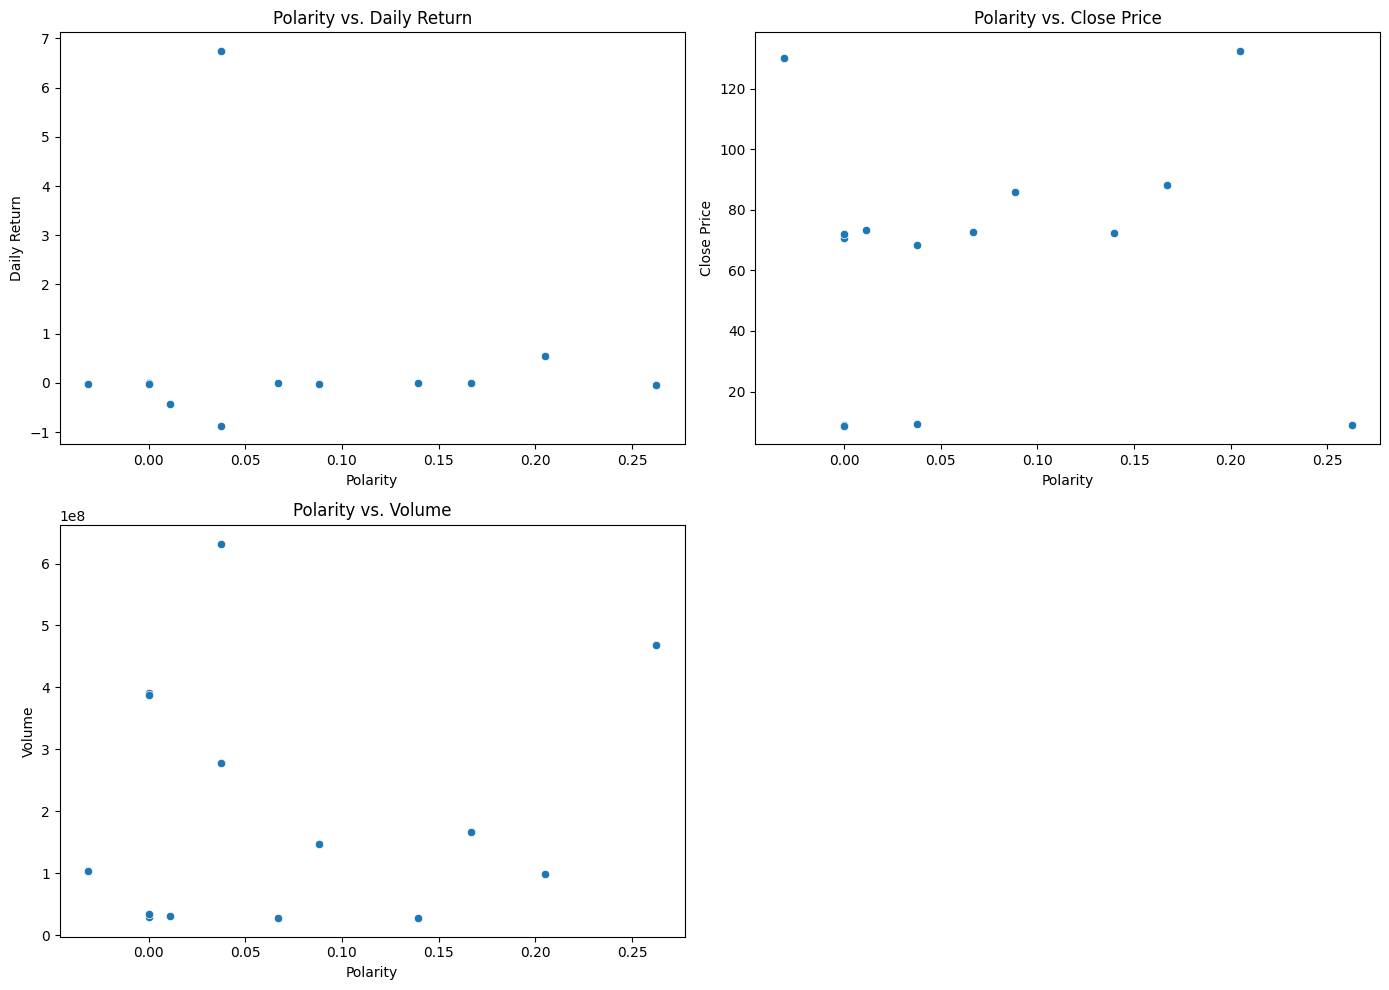

In [32]:
corr_analyser.visualize_relationships(aggregated_data)